In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving weather.csv to weather.csv


In [2]:
import io
weather_df=pd.read_csv(io.BytesIO(uploaded['weather.csv']))

In [3]:
weather_df.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [4]:
weather_df.describe()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,11.866817,0.735663,10.892673,186.870374,10.376632,1004.526053,0.891978
std,9.486422,0.195664,7.062244,107.561170,4.158503,110.996351,0.310439
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.794444,0.600000,5.812100,114.000000,8.259300,1011.780000,1.000000
50%,11.711111,0.780000,10.014200,180.000000,10.046400,1016.430000,1.000000
75%,18.883333,0.900000,14.151900,290.000000,14.836150,1020.980000,1.000000
max,37.055556,1.000000,50.972600,359.000000,16.100000,1044.830000,1.000000


In [5]:
weather_df.shape

(4999, 8)

In [6]:
weather_df.isnull().sum()

Temperature_c           0
Humidity                0
Wind_Speed_kmh          0
Wind_Bearing_degrees    0
Visibility_km           0
Pressure_millibars      0
Rain                    0
Description             0
dtype: int64

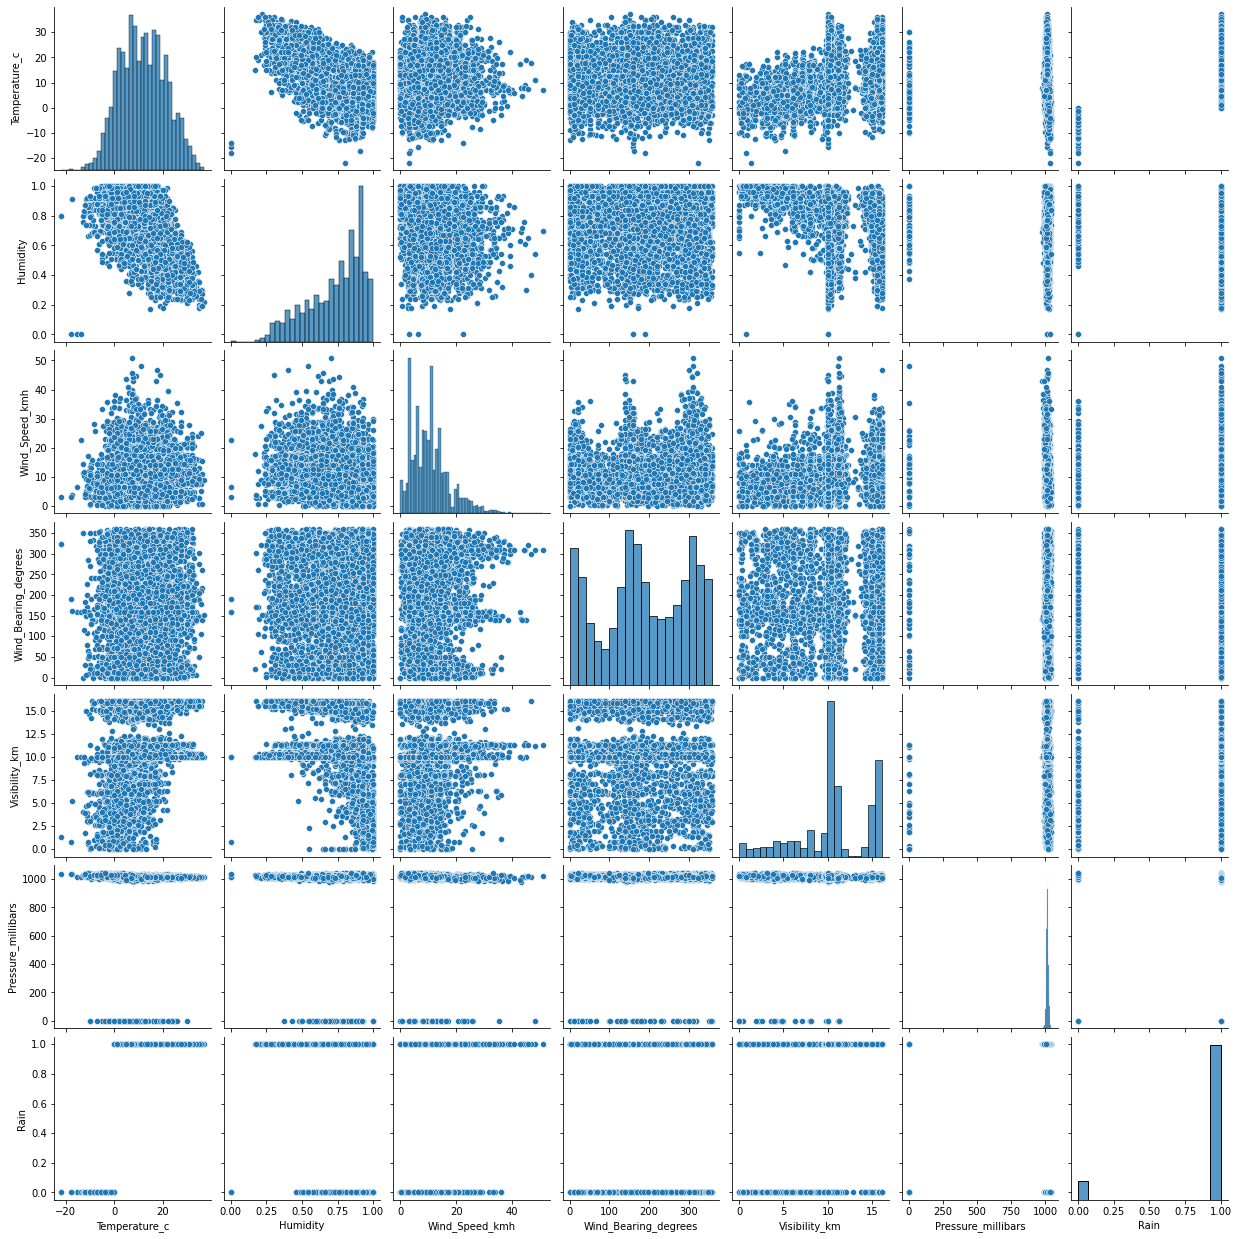

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(weather_df)

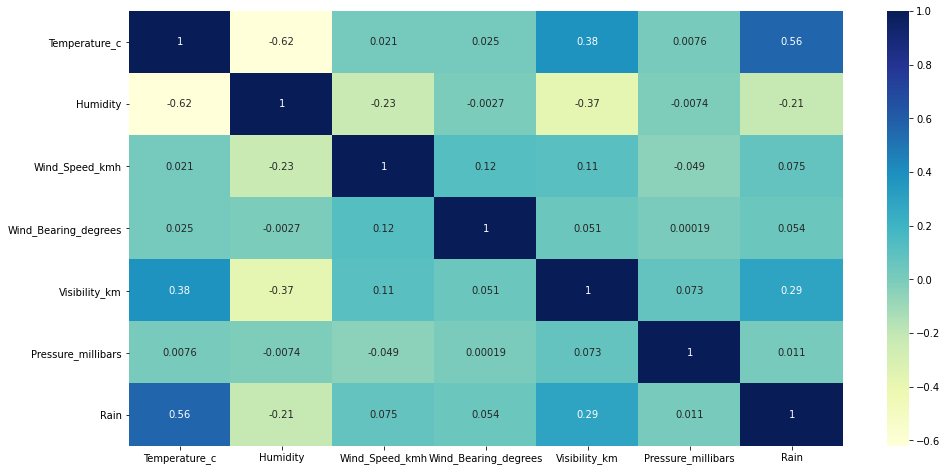

In [8]:
cor=weather_df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

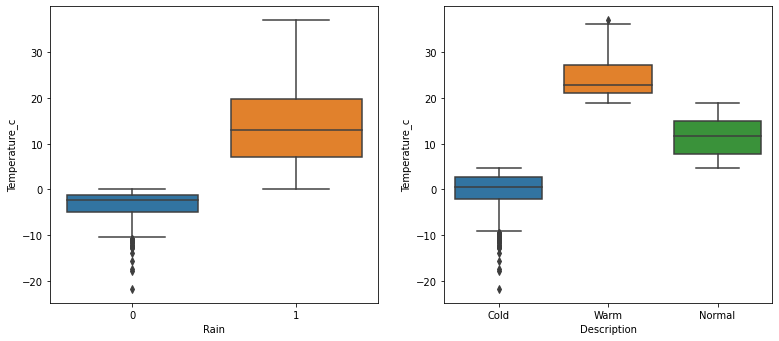

In [9]:
#Boxplot for categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Rain', y = 'Temperature_c' , data = weather_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'Description' , y = 'Temperature_c' , data = weather_df)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


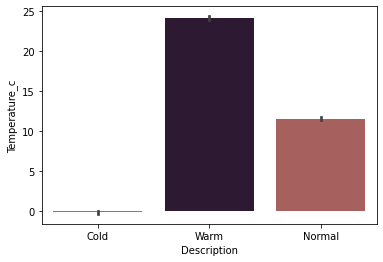

In [10]:
sns.barplot('Description','Temperature_c',data=weather_df,palette='twilight')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


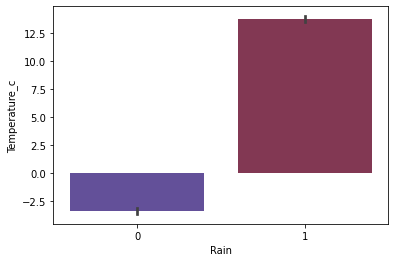

In [11]:
sns.barplot('Rain','Temperature_c',data=weather_df,palette='twilight')

In [12]:
#Single Linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x = weather_df['Humidity'].values
x = x[:,np.newaxis]
y = weather_df['Temperature_c'].values
linear = linear_model.LinearRegression(fit_intercept = True)
linear.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

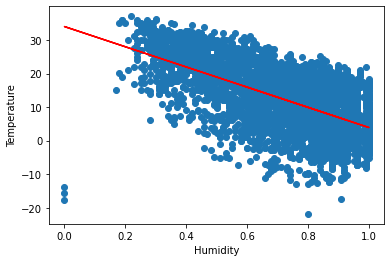

In [13]:
y_pred = linear.predict(x)
plt.plot(x, y_pred, color='red')

plt.scatter(x, y)
plt.xlabel('Humidity') # set the labels of the x and y axes
plt.ylabel('Temperature')
plt.show()

In [14]:
print('Our single linear model had an R^2 of: %0.3f'%linear.score(x[:,[0]], y))

Our single linear model had an R^2 of: 0.385


In [15]:
#Multivariable Linear Regression
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(weather_df[['Humidity','Visibility_km','Rain',]],weather_df.Temperature_c)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
reg.coef_

array([-24.35460931,   0.153551  ,  13.19070599])

In [17]:
reg.intercept_

16.424437898112345

In [18]:
#Calculate R square value.Higher the better.This means the data points are closer to the regression line
x=weather_df[['Humidity','Visibility_km','Rain']].values
y=weather_df['Temperature_c'].values
print('Our multiple linear model had an R^2 of: %0.3f'%reg.score(x, y))

Our multiple linear model had an R^2 of: 0.579


In [19]:
reg.predict([[0.92,9.5,0]])

array([-4.52306817])